# Кластерний аналіз 
#### 1. Метод к-середніх  
#### 2. Ієрархічна кластеризація  

Кластеризація - це метод машинного навчання без вчителя, який включає групування заданих немаркованих даних. Алгоритм кластеризації передбачає, що точки даних, які знаходяться в одному кластері, повинні мати схожі властивості, а точки даних у різних кластерах повинні мати властивості, що сильно відрізняються.  
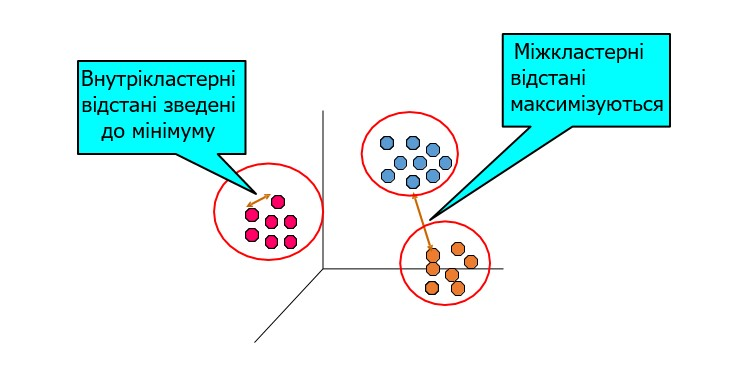  

Кластер: набір об'єктів, подібних (або пов'язаних) один з одним у межах однієї групи, несхожих (або не пов'язаних) з об'єктами в інших групах.

Кластерний аналіз (або кластеризація, сегментація даних,…): пошук подібності між даними відповідно до характеристик, знайдених у даних, і групування подібних об’єктів даних у кластери.

#### Два основних види кластерного аналізу:  
- Алгоритми розподілу (ітеративні алгоритми): будує різні розподіли (кластери), а потім оцінює їх за деяким критерієм.  
- Ієрархічні алгоритми: створює ієрархічну декомпозицію набору об’єктів за допомогою певного критерію.

Розглянемо на практиці реалізацію кожного виду кластерного аналізу

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('customers_data.csv')
data.head()

### Опис датафрейму 
На основі наведеної в датафреймі інформації про клієнтів супермаркету, а саме:
- **CustomerID:** ідентифікатор клієнта  
- **Gender:** стать клієнта супермаркету  
- **Annual Income:** річний дохід клієнтів у тис. дол. США  
- **Spending Score (1-100):** оцінка витрат від 1-100. 100 означає, що клієнт є активним покупцем  
  
необхідно сегментувати клієнтів

In [ ]:
#задамо у якості індексів ID покупців
data.set_index(['CustomerID'], inplace=True)
data.head()

In [ ]:
# видалимо категоріальну змінну Gender
data.drop('Gender', axis=1, inplace=True)

In [ ]:
data.info()
#пропусків в даних немає, тип інформації в кожній колонці розпізнано вірно

### 1. Стандартизація даних    
Як правило дані мають різні типи або вимірюються в дуже різних масштабах, це призводить до того, що деякі змінні можуть відігравати неадекватно домінуючу роль у процесі кластеризації. 
<font color='red'>**Тому необхідно стандартизувати дані перед кластеризацією.**</font> 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # обираємо бажаний метод стандартизації
#scaler.fit(data)
X_stand = scaler.fit_transform(data)

### 2. Метод к-середніх  
Алгоритм K-середніх є одним із найпопулярніших методів ітераційної кластеризації:
- призначений для ситуацій, у яких усі змінні є кількісного типу,
- квадрат евклідової відстані вибирається як міра близькості,
- вхідними параметрами алгоритму є кількість кластерів Κ і набір даних.

### Проведення кластерного аналізу за методом k-середніх

In [ ]:
from sklearn.cluster import KMeans

# Обираємо метод кластеризації та к-ть кластерів
kmeans = KMeans(n_clusters=3, random_state=42) 
#random_state дозволяє "закріпити" присвоєння кожній групі номеру кластеру при багаторазовому повторенні коду

kmeans.fit(X_stand)

# Отримуємо відповідні кластери
labels = kmeans.predict(X_stand)
print(labels)

### Як обрати оптимальну кількість кластерів  
#### Метод зігнутого ліктя  для вибору оптимальної кількості кластерів  
Одним із найскладніших завдань у цьому алгоритмі кластеризації є вибір правильного значення кількості кластерів k. Існує два поширених методи – метод силуету та метод ліктя. Розглянемо метод ліктя.  
**метод .inertia_** - розраховує суму квадратів відстаней об'єктів кластерів до центрів кластерів. Метод ліктя розглядає характер зміни суми квадратів відстаней об'єктів кластерів до центрів кластерів зі збільшенням числа груп k. Об'єднавши всі n спостережень в одну групу, маємо найбільшу внутрішньокластерну дисперсію, яка знижуватиметься до 0 при k→n. На якомусь етапі можна побачити, що зниження дисперсії сповільнюється - на графіці це відбувається в точці, що умовно називається "ліктем".

In [ ]:
from sklearn.cluster import KMeans
klusters = range(2, 11) # задамо кількість кластерів від 2 до 10 (верхня межа в функції range береться невключно)
inertias = []

for k in klusters:
    # задаємо метод кластеризації - к-середніх
    model = KMeans(n_clusters=k)
    
    # оцінюємо модель
    model.fit(X_stand)
    
    # для кожної к-ті кластерів розраховуємо inertia, розраховані значення додаємо в список inertias
    inertias.append(model.inertia_)
    
# зобразимо на графіку показник inertia для кожної к-ті кластерів
plt.figure(figsize=(6,3))
plt.plot(klusters, inertias, '-o', color='red')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(klusters)
plt.show()

Оптимальним можна вважати розбиття на 5 кластерів

In [ ]:
# Розбиваємо дані на 5 кластерів
kmeans = KMeans(n_clusters=5, random_state=42) 
#random_state дозволяє "закріпити" присвоєння кожній групі номеру кластеру при багаторазовому повторенні коду

kmeans.fit(X_stand)

# Отримуємо відповідні кластери
labels = kmeans.predict(X_stand)
print(labels)

In [ ]:
# додамо отримані значення кластерів до таблиці із початковими даними
data['Cluster'] = labels
data.head()

In [ ]:
#перевіримо наповненість кластерів
data[['Cluster']].value_counts()

### Центри кластерів  
Після розбиття об'єктів на кластери необхідно інтерпретувати та дати характеристику кожному кластеру. Це можна зробити на основі аналізу центрів кластерів.  
**.cluster_centers_**  - метод для розрахунку центів кластерів.  
Центр кластера – найбільш типовий представник кластера (його геометричний центр). За характеристиками центру кластера можна судити про весь кластер.

In [ ]:
centers = kmeans.cluster_centers_
print(centers)

In [ ]:
# додамо отримані центри кластерів у датафрейм new_data
new_data = pd.DataFrame(centers, columns = ['Annual Income (k$)', 'Spending Score (1-100)'])
new_data

In [ ]:
# візуалізуємо отримані центри кластерів
plt.figure(figsize = (12,6), dpi = 100)
plt.plot(new_data.iloc[0, :], 'kp:', color='red', marker='o', label='Cluster 1')
plt.plot(new_data.iloc[1, :], 'kp:', color='green', label='Cluster 2')
plt.plot(new_data.iloc[2, :], 'kp:', color='blue', label='Cluster 3')
plt.plot(new_data.iloc[3, :], 'kp:', color='cyan', label='Cluster 4')
plt.plot(new_data.iloc[4, :], 'kp:', color='magenta', label='Cluster 5')
plt.legend()

In [ ]:
dict = {0: 'middle_inc/middle_spend', 
        1: 'high_inc/low_spend', 
        2: 'low_inc/low_spend',
        3: 'low_inc/high_spend',
        4: 'high_inc/high_spend'}
data.replace({'Cluster': dict},inplace=True)
data.head()

In [ ]:
# Середні за кластерами значення
mean_values = data.groupby('Cluster').mean()
print(mean_values)

In [ ]:
sns.relplot(data = data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', height=3, aspect=1.5);

#### Економічна інтерпретація отриманих кластерів - виконати самостійно

## 3. Ієрархічна кластеризація  
Результати ієрархічної кластеризації зазвичай представлені у вигляді двовимірної діаграми, відомої як дендрограма.
Дендрограма надає повний опис ієрархічної кластеризації у графічному форматі, який можна легко інтерпретувати. Це одна з основних причин популярності методів ієрархічної кластеризації.
Різні ієрархічні методи, а також невеликі зміни в даних можуть призвести до досить різних дендрограм.
Кластеризація об'єктів даних виходить шляхом «відтинання» дендрограми на потрібному рівні.  

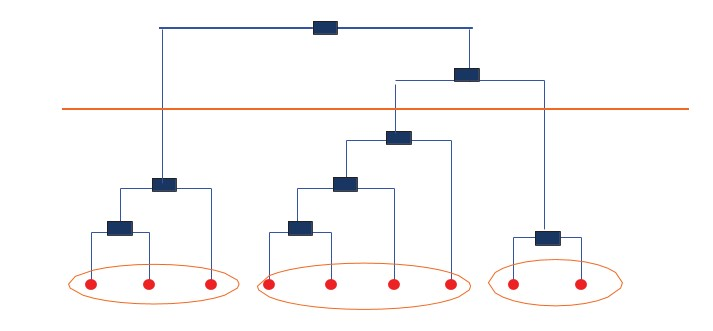

In [ ]:
#Підготовка даних
#samples - дані, зя кими проводитиметься кластеризація (дані мають бути стндартизованими)
samples = X_stand
#підписи горизонтальної осі - ID клієнтів, що є індексами датафрейму
names = np.array(data.index)

In [ ]:
# Ієрархічна кластеризація
from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize = (15,8), dpi = 100)

# Кластеризація
mergings = linkage(samples, method='complete')
# method визначає метод проведення кластеризації. Оберемо один із найпопулярніших - метод повного зв'язку
# Побудова діаграми кластеризації
dendrogram(mergings,labels=names, leaf_rotation=90, leaf_font_size=5)
#leaf_rotation - напрям тексту підписів горизонтальної осі, leaf_font_size - розмір шрифту
plt.show()

Ієрархічний метод кластеризації також іноді може використовуватися перед методом к-середніх для того, щоб візуально оцінити на скільки кластерів варто розбити дані.

<font color='red'>**Не рекомендується використовувати ієрархічну кластеризацію на великих датасетах: побудова дендрограми займатиме чимало часу + велика к-ть об'єктів, які необхідно буде нанести на графік, зробить дендрограму нечитабельною**</font> 